# Semantic link overview

**Semantic link** is a feature that allows you to establish a connection between semantic models and Synapse Data Science in Microsoft Fabric. Use of semantic link is only supported in Microsoft Fabric.

<img src="https://learn.microsoft.com/en-us/fabric/data-science/media/semantic-link-overview/data-flow-with-semantic-link.png">

With semantic link, you can use semantic models from Power BI in the Data Science experience to perform tasks such as in-depth statistical analysis and predictive modeling with machine learning techniques. The output of your data science work can be stored in OneLake using Apache Spark and ingested into Power BI using Direct Lake.

**Useful links:**
- [What is semantic link?](https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-overview)
- [Power BI connectivity with semantic link and Microsoft Fabric](https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-power-bi?tabs=sql)
- [sempy Package](https://learn.microsoft.com/en-us/python/api/semantic-link-sempy/sempy?view=semantic-link-python)
- [Semantic link samples](https://github.com/microsoft/fabric-samples/tree/main/docs-samples/data-science/semantic-link-samples)

## Install sempy

In [1]:
%pip install semantic-link
%load_ext sempy

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 8, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 156.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 187.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 98.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 131.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 209.0 MB/s eta 0:00:00
  Attempting uninstall: semantic-link-sempy
    Found existing installation: semantic-link-sempy 0.6.0
    Not uninstalling semantic-link-sempy at /home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages, outside environment /nfs4/pyenv-b639ee2a-95f6-4319-9ecc-4599ed9dce81
    Can't uninstall 'semantic-lin

## See what's in there and get help

In [2]:
import sempy

print(dir(sempy))

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 10, Finished, Available)

['__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__version__', '_get_artifact_type', '_get_environment', '_initialize_log', '_metadata', '_on_fabric', '_utils', '_version', 'dependencies', 'fabric', 'functions', 'get_artifact_id', 'get_notebook_workspace_id', 'load_ipython_extension', 'relationships']


In [3]:
import sempy.fabric as fabric
import sempy.dependencies as dependencies
import sempy.functions as functions
import sempy.relationships as relationships
import sempy.samples as samples

print("\n------------ fabric ------------------------\n")
print(dir(fabric))
print("\n------------ dependencies ------------------------\n")
print(dir(dependencies))
print("\n------------ functions ------------------------\n")
print(dir(functions))
print("\n------------ relationships ------------------------\n")
print(dir(relationships))
print("\n------------ samples ------------------------\n")
print(dir(samples))

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 11, Finished, Available)


------------ fabric ------------------------

['DataCategory', 'FabricDataFrame', 'FabricRestClient', 'FabricSeries', 'MetadataKeys', 'PowerBIRestClient', 'RefreshExecutionDetails', 'Trace', 'TraceConnection', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '_cache', '_client', '_datacategory', '_dataframe', '_daxmagics', '_environment', '_flat', '_flat_list_annotations', '_flat_list_apps', '_flat_list_calculation_items', '_flat_list_columns', '_flat_list_dataflows', '_flat_list_datasources', '_flat_list_gateways', '_flat_list_hierarchies', '_flat_list_partitions', '_flat_list_perspectives', '_flat_list_relationships', '_metadatakeys', '_token_provider', '_trace', '_trace_evaluate_dax', '_utils', 'create_lakehouse', 'create_notebook', 'create_tom_server', 'create_trace_connection', 'create_workspace', 'delete_item', 'evaluate_dax', 'evaluate_measure', 'exceptions', 'execute_tmsl', 'execute_xmla', 'get_

In [4]:
import sempy.fabric as fabric

help(fabric.list_items)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 12, Finished, Available)

Help on function list_items in module sempy.fabric._flat:

list_items(type: Optional[str] = None, workspace: Union[str, uuid.UUID, NoneType] = None) -> pandas.core.frame.DataFrame
    Return a list of items in the specified workspace.
    
    Parameters
    ----------
    type : str, default=None
        Filter the list of items by the type specified (see `valid types <https://learn.microsoft.com/en-us/rest/api/fabric/core/items/list-items?tabs=HTTP#itemtype>`_).
    workspace : str or uuid.UUID, default=None
        The Fabric workspace name or UUID object containing the workspace ID. Defaults to None
        which resolves to the workspace of the attached lakehouse
        or if no lakehouse attached, resolves to the workspace of the notebook.
    
    Returns
    -------
    pandas.DataFrame
        DataFrame with one row per artifact.



# Case 1 - Document tenant/workspace-level metadata

## List capacities

In [5]:
import sempy.fabric as fabric

fabric.list_capacities()

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 13, Finished, Available)

,Id,Display Name,Sku,Region,State
0,dc77d742-42b1-4fc7-9aa0-214254a7e51f,polandcentralf2,F2,Poland Central,Inactive
1,355b8abe-a9a9-46b9-bc00-cdd0ad48e54a,northcentralusf64,F64,North Central US,Inactive
2,09c415c2-f9b9-41c5-8e38-5bad56869474,Trial-demo1-analyticsdemoorg-onmicrosoft-com-0...,FT1,North Central US,Active
3,1c608439-53e5-411d-b3b5-a382ed2b52c1,northcentralusf2,F2,North Central US,Inactive
4,0d679e34-f500-41bc-bd8e-946771e518a1,westus2f2,F2,West US 2,Inactive
5,95908ec4-26b6-4857-9bae-d9c059d6c747,Premium Per User - Reserved,PP3,North Central US,Active


## List workspaces

In [6]:
import sempy.fabric as fabric

fabric.list_workspaces()

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 14, Finished, Available)

,Id,Is Read Only,Is On Dedicated Capacity,Capacity Id,Default Dataset Storage Format,Type,Name
0,d7b95e96-1b0c-49a1-89ca-81000dfb0f67,False,True,09c415c2-f9b9-41c5-8e38-5bad56869474,Large,Workspace,Azure Synapse + Power BI Demo
1,68e72dfe-d469-496a-bf3a-ffe965ede54f,False,True,95908ec4-26b6-4857-9bae-d9c059d6c747,Small,Workspace,Power BI Demo Workspace
2,1dfeafa0-d834-4579-9643-dd0d9077b5cf,False,False,NaN,NaN,AdminInsights,Admin monitoring
3,06becd0f-fb86-4fb4-8761-123a5fe326a5,False,True,09c415c2-f9b9-41c5-8e38-5bad56869474,Small,Workspace,Kusto Detective Agency
4,0cd12247-dd80-448f-ae2d-8c1202d11b00,False,True,09c415c2-f9b9-41c5-8e38-5bad56869474,Small,Workspace,Demo Fabric - Finance
5,d0d5b682-cac5-40eb-9b62-7b405a064445,False,True,09c415c2-f9b9-41c5-8e38-5bad56869474,Small,Workspace,Demo Fabric - Direct Lake
6,52a59b7f-e667-4366-a8c9-d1d89f6679e3,False,True,09c415c2-f9b9-41c5-8e38-5bad56869474,Small,Workspace,Demo Fabric - Data Warehouse
7,ac63e86b-e873-41da-83fc-8715c45fce2f,False,False,NaN,NaN,Workspace,Premium Capacity Utilization And Metrics 9/13/...
8,57def871-2800-4453-bd7e-543540a8898c,False,True,09c415c2-f9b9-41c5-8e38-5bad56869474,Small,Workspace,TPCH
9,caf61d5c-6e7a-458f-8315-9808ad134e12,False,True,0d679e34-f500-41bc-bd8e-946771e518a1,Small,Workspace,OneLake Geo Demo - West US 2


## List items of specific type from specific workspace

In [7]:
import sempy.fabric as fabric

fabric.list_items(type="Notebook", workspace="SQL Demo")

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 15, Finished, Available)

,Id,Display Name,Description,Type,Workspace Id
0,2882549d-9f14-495d-b7a5-9f51306c9666,Notebook 5 - Lightweight SQL,New notebook,Notebook,f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d
1,c7167168-8e66-42ef-b27a-61ebba06559f,Notebook 1 - Working with lakehouse,New notebook,Notebook,f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d
2,5c6dda62-ce21-4833-b77f-67b472ff75ed,Notebook 0 - DEMO Control Pane,New notebook,Notebook,f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d
3,0b597a2d-1b6f-40e4-ad52-b52eb9531947,Notebook 2 - Ad-hoc analysis over external sho...,New notebook,Notebook,f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d
4,9c289c2d-9fda-484d-a782-c795abc730af,Notebook 3 - Ad-hoc analysis over semantic model,New notebook,Notebook,f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d
5,bc33d47b-1eb3-4e13-9657-8f68a1da5068,Notebook 4 - Semantic Link,New notebook,Notebook,f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d


## Now let's try some combo!

In [8]:
import sempy.fabric as fabric
import pandas as pd 

df = pd.concat([fabric.list_items(workspace=ws) for ws in fabric.list_workspaces().query('`Is On Dedicated Capacity` == True').Id], ignore_index=True)
df

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 16, Finished, Available)

,Id,Display Name,Description,Type,Workspace Id
0,712a8001-160e-4785-8438-fc0b08f055ea,NYC Yellow Taxi Report,,Report,d7b95e96-1b0c-49a1-89ca-81000dfb0f67
1,12d895ee-3d1f-4d82-976d-110185fe8327,NYC Yellow Taxi Report on Datamart,,Report,d7b95e96-1b0c-49a1-89ca-81000dfb0f67
2,d3ad187c-7509-427c-9501-599b89d6f9eb,NYC Yellow Taxi Report (Delta),,SemanticModel,d7b95e96-1b0c-49a1-89ca-81000dfb0f67
3,e8ba65b4-58b6-478c-9170-d934ba6aa445,NYC Yellow Taxi Datamart,,SemanticModel,d7b95e96-1b0c-49a1-89ca-81000dfb0f67
4,43d26d82-6fe8-4a9d-a675-baa5fe192f43,Test,,SemanticModel,d7b95e96-1b0c-49a1-89ca-81000dfb0f67
...,...,...,...,...,...
123,c42fad53-fdc0-4d2d-8346-cf7cd9d91adb,AdminLakehouse,,SQLEndpoint,39d39259-cfdb-40ec-ad63-54311a0803c0
124,8bdfaaff-b711-4c48-9780-91ed617a9bcc,FabricAPIs-TranslateReport,New notebook,Notebook,39d39259-cfdb-40ec-ad63-54311a0803c0
125,1cc77e98-038b-4705-a3d3-31aa901bc452,Semantic link - intro and use cases,New notebook,Notebook,39d39259-cfdb-40ec-ad63-54311a0803c0
126,64b259ca-1491-465d-a8c6-92ee23ef2ce9,GoldLakehouse,,Lakehouse,39d39259-cfdb-40ec-ad63-54311a0803c0


## Call Fabric REST APIs (and expand beyond functions in sempy)

### List tenant settings and their values

In [38]:
import sempy.fabric as fabric
import pandas as pd

client = fabric.FabricRestClient()

# Check https://learn.microsoft.com/en-us/rest/api/fabric/articles/ for a list of APIs
response = client.get(f"v1/admin/tenantsettings")

df = pd.json_normalize(response.json()["tenantSettings"])
df

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 46, Finished, Available)

,settingName,title,enabled,canSpecifySecurityGroups,tenantSettingGroup,properties,enabledSecurityGroups
0,AllowServicePrincipalsUseReadAdminAPIs,Service principals can access read-only admin ...,False,True,Admin API settings,NaN,NaN
1,AdminApisIncludeDetailedMetadata,Enhance admin APIs responses with detailed met...,False,True,Admin API settings,NaN,NaN
2,AdminApisIncludeExpressions,Enhance admin APIs responses with DAX and mash...,False,True,Admin API settings,NaN,NaN
3,AllowAccessOverPrivateLinks,Azure Private Link,False,False,Advanced networking,NaN,NaN
4,BlockAccessFromPublicNetworks,Block Public Internet Access,False,False,Advanced networking,NaN,NaN
...,...,...,...,...,...,...,...
115,ExpFlightingTenant,Help Power BI optimize your experience,True,False,User experience experiments,NaN,NaN
116,CreateAppWorkspaces,Create workspaces,True,True,Workspace settings,NaN,NaN
117,UseDatasetsAcrossWorkspaces,Use semantic models across workspaces,True,True,Workspace settings,NaN,NaN
118,RestrictMyFolderCapacity,Block users from reassigning personal workspac...,False,False,Workspace settings,NaN,NaN


💡 **HINT** You can write data back to the lakehouse (save to files or tables).

In [37]:
import sempy.fabric as fabric
import pandas as pd

client = fabric.FabricRestClient()

# Check https://learn.microsoft.com/en-us/rest/api/fabric/articles/ for a list of APIs
response = client.get(f"v1/admin/tenantsettings")

df = pd.json_normalize(response.json()["tenantSettings"])

df_Spark = spark.createDataFrame(df)
df_Spark.select("tenantSettingGroup", "title", "enabled").write.option("overwrite", "true").saveAsTable("tenant_settings")

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 45, Finished, Available)

### List domains

In [10]:
import sempy.fabric as fabric
import pandas as pd

client = fabric.FabricRestClient()

# Check https://learn.microsoft.com/en-us/rest/api/fabric/articles/ for a list of APIs
response = client.get(f"v1/admin/domains")

df = pd.json_normalize(response.json()["domains"])
df

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 18, Finished, Available)

,id,displayName,description,parentDomainId,contributorsScope
0,37be5a8f-392a-47a7-92a4-be3600248c46,Finance,Data owned and maintained by the Finance depar...,None,AllTenant
1,f79caef0-3e7b-4df2-ac8a-cbc94daf6d9a,Transport,Data owned and maintained by the Transport dep...,None,AllTenant


### List items of specific type from current workspace

In [11]:
import sempy.fabric as fabric
import pandas as pd

client = fabric.FabricRestClient()

itemtype = "SemanticModel"
myworkspace = fabric.get_workspace_id()

# Check https://learn.microsoft.com/en-us/rest/api/fabric/articles/ for a list of APIs
response = client.get(f"v1/workspaces/{myworkspace}/items?type={itemtype}")

df = pd.json_normalize(response.json()["value"])
df

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 19, Finished, Available)

,id,type,displayName,description,workspaceId
0,6a4b4017-ea5e-42fa-b55d-d7f1b8b01890,SemanticModel,Demo Model,,39d39259-cfdb-40ec-ad63-54311a0803c0
1,5cf0b4dd-0725-4ecc-9b58-2c770c33174d,SemanticModel,GoldLakehouse,,39d39259-cfdb-40ec-ad63-54311a0803c0
2,e38d68df-ebf6-48f1-b081-3dde731bfdae,SemanticModel,GoldLakehouse2,,39d39259-cfdb-40ec-ad63-54311a0803c0
3,3dd6c22a-8c28-428c-8cf5-d543ae9f663d,SemanticModel,AdminLakehouse,,39d39259-cfdb-40ec-ad63-54311a0803c0


### List tables from specific lakehouse

In [12]:
import sempy.fabric as fabric
import pandas as pd

client = fabric.FabricRestClient()

type = "SemanticModel"
workspaceId = "f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d"
lakehouseId = "154e6c58-2a7f-416d-bccc-864b2936eb8c"

# Check https://learn.microsoft.com/en-us/rest/api/fabric/articles/ for a list of APIs
response = client.get(f"v1/workspaces/{workspaceId}/lakehouses/{lakehouseId}/tables")

df = pd.json_normalize(response.json()["data"])
df

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 20, Finished, Available)

,type,name,location,format
0,Managed,trip,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
1,Managed,payment_type,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
2,Managed,trip_curated,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
3,Managed,StocksDaily,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
4,Managed,Financials,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
5,Managed,Time,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
6,Managed,trip_large,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
7,Managed,trip_agg,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
8,Managed,dimPaymentType,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta
9,Managed,factTrip,abfss://f826a61a-1236-4dcf-b6ce-8e8ed0a66e4d@o...,delta


# Case 2 - Document semantic models

## List semantic models

In [13]:
import sempy.fabric as fabric
import pyspark.sql.functions as F

df_datasets = fabric.list_datasets(workspace="Demo Fabric - Semantic Link")
df_datasets

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 21, Finished, Available)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,Demo Model,6a4b4017-ea5e-42fa-b55d-d7f1b8b01890,2020-01-25 09:38:00,NaT
1,GoldLakehouse,5cf0b4dd-0725-4ecc-9b58-2c770c33174d,2021-02-12 23:00:58,NaT
2,GoldLakehouse2,e38d68df-ebf6-48f1-b081-3dde731bfdae,2021-02-12 23:00:58,NaT
3,AdminLakehouse,3dd6c22a-8c28-428c-8cf5-d543ae9f663d,2021-02-12 23:00:58,NaT


## List tables in semantic model

In [14]:
import sempy.fabric as fabric

myworkspace = "Demo Fabric - Semantic Link"
mydataset = "Demo Model"
fabric.list_tables(dataset=mydataset, workspace=myworkspace)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 22, Finished, Available)

,Name,Description,Hidden,Data Category,Type
0,Orders,,False,,Table
1,Products,,False,,Table
2,Targets,,True,,Table
3,Time,,False,Time,Calculated Table
4,Geography,,False,,Table
5,KPIs,,False,,Table


### List columns of specific table from specific semantic model

💡 **HINT:** You can use this information to produce a complex report on the size of your model - see this blog post from Sandeep Pawar: https://fabric.guru/calculating-and-reducing-power-bi-dataset-size-using-semantic-link

In [51]:
import sempy.fabric as fabric

myworkspace = "Demo Fabric - Semantic Link"
mydataset = "Demo Model"
mytable = "Products"
fabric.list_columns(dataset=mydataset, workspace=myworkspace, table=mytable, extended=True)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 59, Finished, Available)

,Table Name,Column Name,Description,Type,Data Type,Hidden,Format String,Source,Data Category,Display Folder,...,Modified Time,Column Cardinality,Total Size,Data Size,Dictionary Size,Hierarchy Size,Encoding,Is Resident,Temperature,Last Accessed
0,Products,RowNumber-2662979B-1795-4F74-8F37-6A1BA8059B61,,RowNumber,Int64,True,,None,,,...,2020-01-25 09:42:42,3789,128,128,0,0,NaN,<NA>,<NA>,NaT
1,Products,Product ID,,Data,String,False,,Product ID,,,...,2024-02-21 08:01:01,3789,158051,6192,121507,30352,Hash,True,<NA>,NaT
2,Products,Category,,Data,String,False,,Category,,,...,2024-02-21 08:01:01,4,17430,136,17214,80,Hash,True,<NA>,NaT
3,Products,Sub-Category,,Data,String,False,,Sub-Category,,,...,2024-02-21 08:01:01,18,18006,264,17550,192,Hash,True,<NA>,NaT
4,Products,Product Name,,Data,String,False,,Product Name,,,...,2024-02-21 08:01:01,3789,252385,6192,215841,30352,Hash,True,<NA>,NaT


## List measures in semantic model

💡 **HINT:** If you miss DAX formatting in results below, check this blog post by Sandeep Pawar: https://fabric.guru/formatting-dax-expression-returned-by-sempy-in-fabric

In [16]:
import sempy.fabric as fabric

myworkspace = "Demo Fabric - Semantic Link"
mydataset = "Demo Model"
fabric.list_measures(dataset=mydataset, workspace=myworkspace)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 24, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description,Format String,Data Category,Detail Rows Definition,Format String Definition
0,KPIs,Sales,SUM(Orders[Sales]),Double,False,,,"\$#,0;(\$#,0);\$#,0",,None,None
1,KPIs,Budget,SUM(Targets[Target]),Double,False,,,"\$#,0.00;(\$#,0.00);\$#,0.00",,None,None
2,KPIs,VTB,[Sales]-[Budget],Double,False,,,"\$#,0;(\$#,0);\$#,0",,None,None
3,KPIs,VTB %,"DIVIDE([VTB], [Budget])",Double,False,,,0.00%;-0.00%;0.00%,,None,None
4,KPIs,Orders,COUNT(Orders[Order ID]),Int64,False,,,"#,0",,None,None
5,KPIs,Profit,SUM(Orders[Profit]),Double,False,,,"\$#,0.00;(\$#,0.00);\$#,0.00",,None,None
6,KPIs,Margin %,"DIVIDE([Profit], [Sales])",Double,False,,,0.00%;-0.00%;0.00%,,None,None
7,KPIs,Sales YTD,"\nCALCULATE (\n [Sales], \n FILTER (\n ...",Double,False,,,"\$#,0.###############;(\$#,0.###############);...",,None,None
8,KPIs,Budget YTD,"\nCALCULATE (\n [Budget], \n FILTER (\n ...",Double,False,,,"\$#,0.###############;(\$#,0.###############);...",,None,None
9,KPIs,Avg Sales,"IF([Orders] = 0, 0, DIVIDE([Sales], [Orders]))",Double,False,,,"\$#,0.00;(\$#,0.00);\$#,0.00",,None,None


## Draw a relationship diagram for semantic model

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 25, Finished, Available)

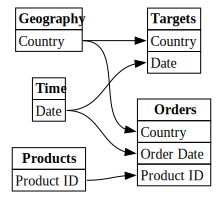

In [17]:
import sempy.fabric as fabric
from sempy.relationships import plot_relationship_metadata

mydataset = "Demo Model"
relationships = fabric.list_relationships(mydataset)
plot_relationship_metadata(relationships)

# Case 3 - Run diagnostics queries over semantic model

## Run DMV to check resident columns

💡 **HINT:** Useful to check the size of specific columns and the temperature of columns (Direct Lake!)

💡 **HINT:** Next step is to warm up the Direct Lake cache - see this code from Michael Kovalsky: https://github.com/m-kovalsky/Fabric/blob/main/WarmDirectLakeCache_IsResident.py

In [18]:
import sempy.fabric as fabric

mydataset = "GoldLakehouse2"

df_dax = fabric.evaluate_dax(
    mydataset,
    """
    SELECT 
        MEASURE_GROUP_NAME,
        ATTRIBUTE_NAME ,
        DATATYPE ,
        DICTIONARY_SIZE ,
        DICTIONARY_ISPAGEABLE ,
        DICTIONARY_ISRESIDENT ,
        DICTIONARY_TEMPERATURE ,
        DICTIONARY_LAST_ACCESSED
    FROM $SYSTEM.DISCOVER_STORAGE_TABLE_COLUMNS 
    ORDER BY [DICTIONARY_TEMPERATURE] DESC
    """)
df_dax.head(20)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 26, Finished, Available)

,MEASURE_GROUP_NAME,ATTRIBUTE_NAME,DATATYPE,DICTIONARY_SIZE,DICTIONARY_ISPAGEABLE,DICTIONARY_ISRESIDENT,DICTIONARY_TEMPERATURE,DICTIONARY_LAST_ACCESSED
0,trip,passenger_count,DBTYPE_R8,2376,True,True,0.079492,2024-04-16 06:49:23.027
1,payment_type,payment_type_name,DBTYPE_WSTR,0,True,False,<NA>,NaT
2,trip,RatecodeID,DBTYPE_R8,0,True,False,<NA>,NaT
3,trip,VendorID,DBTYPE_I8,0,True,False,<NA>,NaT
4,trip,payment_type,DBTYPE_I8,0,True,False,<NA>,NaT
5,trip,trip_distance,DBTYPE_R8,0,True,False,<NA>,NaT
6,trip,RowNumber-2662979B-1795-4F74-8F37-6A1BA8059B61,DBTYPE_I8,128,False,True,<NA>,NaT
7,trip,store_and_fwd_flag,DBTYPE_WSTR,0,True,False,<NA>,NaT
8,trip,PULocationID,DBTYPE_I8,0,True,False,<NA>,NaT
9,trip,DOLocationID,DBTYPE_I8,0,True,False,<NA>,NaT


# Case 4 - Access semantic model's data

## Get data from model

In [35]:
import sempy.fabric as fabric

fabric.read_table("Demo Model", "Products")

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 43, Finished, Available)

,Product ID,Category,Sub-Category,Product Name
0,OFF-PA-2847,Office Supplies,Paper,"""While you Were Out"" Message Book, One Form pe..."
1,OFF-PA-2856,Office Supplies,Paper,1/4 Fold Party Design Invitations & White Enve...
2,OFF-PA-2859,Office Supplies,Paper,14-7/8 x 11 Blue Bar Computer Printout Paper
3,OFF-PA-3007,Office Supplies,Paper,"Adams ""While You Were Out"" Message Pads"
4,OFF-PA-3008,Office Supplies,Paper,"Adams Phone Message Book, 200 Message Capacity..."
...,...,...,...,...
3784,FUR-BO-5970,Furniture,Bookcases,"Sauder Mission Library with Doors, Fruitwood F..."
3785,FUR-BO-5971,Furniture,Bookcases,"Sauder Stackable Bookrack, Mobile"
3786,FUR-BO-5972,Furniture,Bookcases,"Sauder Stackable Bookrack, Pine"
3787,FUR-BO-5973,Furniture,Bookcases,"Sauder Stackable Bookrack, Traditional"


In [36]:
import sempy.fabric as fabric

fabric.evaluate_measure(
    "Demo Model",
    "Sales",
    ["Products[Category]"])


StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 44, Finished, Available)

,Category,Sales
0,Furniture,4110451.8983
1,Office Supplies,3787492.5135
2,Technology,4744557.49808


## Run some DAX

In [19]:
import sempy.fabric as fabric

mydataset = "Demo Model"

myDax = """
    evaluate
        SUMMARIZECOLUMNS(
            Time[Month] ,
            "Sales" , [Sales]
        )
    """
fabric.evaluate_dax(mydataset,myDax).head(20)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 27, Finished, Available)

,Time[Month],[Sales]
0,2012-01,98898.48886
1,2012-02,103717.92328
2,2012-03,135746.40206
3,2012-04,114332.96318
4,2012-05,158228.3288
5,2012-06,207571.54352
6,2012-07,118434.88462
7,2012-08,208063.28372
8,2012-09,284587.74846
9,2012-10,216114.56748


## Run some more DAX

In [20]:
%load_ext sempy

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 28, Finished, Available)

The sempy extension is already loaded. To reload it, use:
  %reload_ext sempy


In [21]:
%%dax "Demo Model"

evaluate
    SUMMARIZECOLUMNS(
        Time[Month] ,
        "Sales" , [Sales]
    )

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 29, Finished, Available)

,Time[Month],[Sales]
0,2012-01,98898.48886
1,2012-02,103717.92328
2,2012-03,135746.40206
3,2012-04,114332.96318
4,2012-05,158228.3288
5,2012-06,207571.54352
6,2012-07,118434.88462
7,2012-08,208063.28372
8,2012-09,284587.74846
9,2012-10,216114.56748


## What about some (Spark) SQL?

✅ Enable semantic link Spark native connector for Power BI

In [22]:
spark.conf.set("spark.sql.catalog.pbi", "com.microsoft.azure.synapse.ml.powerbi.PowerBICatalog")

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 30, Finished, Available)

📄 List specific table from semantic model

In [25]:
%%sql
SELECT * FROM pbi.`Demo Model`.Products LIMIT 10;

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 33, Finished, Available)

<Spark SQL result set with 10 rows and 4 fields>

📄 Run some analytics with predicate pushdown to the Power BI engine

In [29]:
%%sql
SELECT 
    `Products[Category]`,
    SUM(`Sales`)
FROM pbi.`Demo Model`.`_Metrics`
GROUP BY `Products[Category]`;

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 37, Finished, Available)

<Spark SQL result set with 3 rows and 2 fields>

📄 Augment data with Power BI measures

In [33]:
from sempy.fabric import FabricDataFrame

df = FabricDataFrame({
        "Category Manager": ["Jan Kowalski", "John Doe", "Alice Smith"],
        "Products[Category]": ["Furniture", "Office Supplies", "Technology"]
    }
)

joined_df = df.add_measure(["Sales"], dataset="Demo Model")
joined_df

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 41, Finished, Available)

,Category Manager,Products[Category],Sales
0,Jan Kowalski,Furniture,4110451.8983
1,John Doe,Office Supplies,3787492.5135
2,Alice Smith,Technology,4744557.49808


# Case 5 - Refresh semantic models

💡 **HINT:** For more methods and details on how to refresh models or selected tables/partitions check this blog from Sandeep Pawar: https://fabric.guru/refreshing-individual-tables-and-partitions-with-semantic-link

In [52]:
import sempy.fabric as fabric

myworkspace = "Demo Fabric - Semantic Link"
mydataset = "GoldLakehouse2"

fabric.refresh_dataset(workspace=myworkspace, dataset=mydataset)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 60, Finished, Available)

'ac3b616b-801c-4b84-ac0b-f25e1fd938ee'

# Case 6 - Create workspaces, items,... programmatically

✅ Create a workspace

In [46]:
import sempy.fabric as fabric

myworkspace = fabric.create_workspace(display_name="New Demo Workspace", capacity_id="09c415c2-f9b9-41c5-8e38-5bad56869474")

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 54, Finished, Available)

✅ Create a lakehouse

In [49]:
import sempy.fabric as fabric

mylakehouse = fabric.create_lakehouse(display_name="DemoLakehouse", workspace=myworkspace)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 57, Finished, Available)

✅ Create a shortcut

🔗 Creating a shortcut without Semantic Link: https://github.com/pawelpo/Fabric/blob/main/Code%20Samples/Notebooks/Programmatically%20create%20OneLake%20shortcut.ipynb

In [50]:
import sempy.fabric as fabric
import pandas as pd

client = fabric.FabricRestClient()

sourceWorkspaceId = spark.conf.get("trident.workspace.id") # current workspace ID
sourceItemId = spark.conf.get("trident.lakehouse.id") # current lakehouse ID
sourcePath = "/Tables/tenant_settings"
path = "/Tables"
tableName = "tenant_settings_shortcut"

json_body = {
        "path": f"{path}", 
        "name": f"{tableName}",
        "target": {
            "oneLake": {
                "workspaceId": f"{sourceWorkspaceId}",
                "itemId": f"{sourceItemId}",
                "path": f"{sourcePath}"
            }
        }
    }

# Check https://learn.microsoft.com/en-us/rest/api/fabric/articles/ for a list of APIs
client.post(f"v1/workspaces/{myworkspace}/items/{mylakehouse}/shortcuts", json=json_body)

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 58, Finished, Available)

<Response [201]>

# Case 7 - Validate functional dependencies in data

📂 Dataset downloaded from https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

💡 **HINT:** For more complex example check this tutorial: https://github.com/microsoft/fabric-samples/blob/main/docs-samples/data-science/semantic-link-samples/data_cleaning_functional_dependencies_tutorial.ipynb

## Display functional dependencies

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 65, Finished, Available)

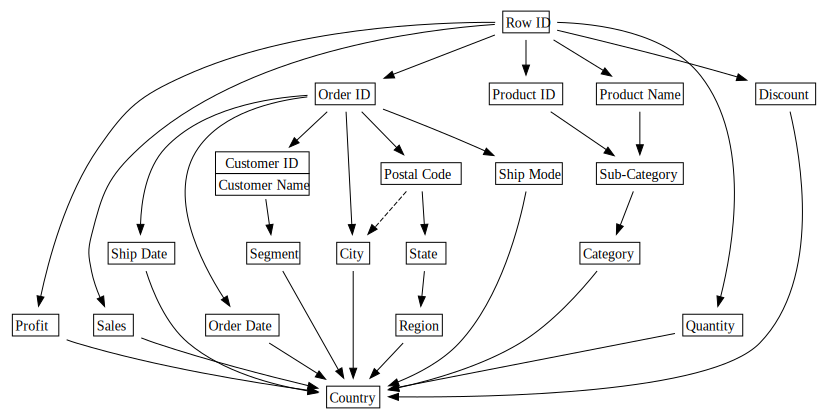

In [57]:
from sempy.fabric import FabricDataFrame
from sempy.dependencies import plot_dependency_metadata

deps = df.find_dependencies()
plot_dependency_metadata(deps)


## Show dependecy violations

In [59]:
df.list_dependency_violations(determinant_col="Postal Code", dependent_col="City")

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 67, Finished, Available)

,Postal Code,City,count
0,92024,San Diego,34
1,92024,Encinitas,5


StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 68, Finished, Available)

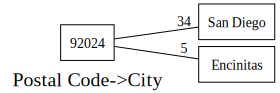

In [60]:
df.plot_dependency_violations(determinant_col="Postal Code", dependent_col="City")

# Case 8 - Validate data quality

💡 **HINT:** For more complext example check this tutorial: https://github.com/microsoft/fabric-samples/blob/main/docs-samples/data-science/semantic-link-samples/great_expectations_tutorial.ipynb

In [62]:
# install libraries
%pip install semantic-link great-expectations great_expectations_experimental great_expectations_zipcode_expectations

# load %%dax cell magic
%load_ext sempy

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 75, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 53.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.9/180.9 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 151.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 134.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 163.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 137.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [68]:
import pandas as pd
import great_expectations as gx
from great_expectations.expectations.expectation import ExpectationConfiguration
from great_expectations_zipcode_expectations.expectations import expect_column_values_to_be_valid_zip5
import sempy.fabric as fabric

context = gx.get_context()

ds = context.sources.add_fabric_powerbi("Demo Model Data Source", dataset="Demo Model")

ds.add_powerbi_table_asset("Products Asset", table="Products")

suite_store = context.add_expectation_suite("Demo Model Suite")
suite_store.add_expectation(ExpectationConfiguration("expect_table_row_count_to_be_between", { "min_value": 3900, "max_value": 4000 }))
context.add_or_update_expectation_suite(expectation_suite=suite_store)

checkpoint_config = {
    "name": f"Demo Model Checkpoint",
    "validations": [
        {
            "expectation_suite_name": "Demo Model Suite",
            "batch_request": {
                "datasource_name": "Demo Model Data Source",
                "data_asset_name": "Products Asset",
            },
        }
    ]
}
checkpoint = context.add_checkpoint(
    **checkpoint_config
)

result = checkpoint.run()

result

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 85, Finished, Available)

Created temporary directory '/tmp/tmp7mzo55l1' for ephemeral docs site


Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

{
  "run_id": {
    "run_name": null,
    "run_time": "2024-04-16T10:27:08.706590+00:00"
  },
  "run_results": {
    "ValidationResultIdentifier::Demo Model Suite/__none__/20240416T102708.706590Z/Demo Model Data Source-Products Asset": {
      "validation_result": {
        "success": false,
        "results": [
          {
            "success": false,
            "expectation_config": {
              "expectation_type": "expect_table_row_count_to_be_between",
              "kwargs": {
                "max_value": 4000,
                "min_value": 3900,
                "batch_id": "Demo Model Data Source-Products Asset"
              },
              "meta": {}
            },
            "result": {
              "observed_value": 3789
            },
            "meta": {},
            "exception_info": {
              "raised_exception": false,
              "exception_traceback": null,
              "exception_message": null
            }
          }
        ],
        "evaluation_

StatementMeta(, 4de3b0ca-83d0-4bb7-9730-90996a6101b4, 86, Finished, Available)